# ERCOT Temperature Maps for NCSU

In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
data_input_dir =  '/Users/burl878/Documents/IMMM/Data/Random/ERCOT_Heat_Wave_Cold_Snap_Figure/'
image_output_dir =  '/Users/burl878/Documents/IMMM/Data/Random/ERCOT_Heat_Wave_Cold_Snap_Figure/'


## Set the Plot Constraints

In [3]:
# Set the lat/lon bounds for the plot:
lat_min = 25
lat_max = 38
lon_min = -108
lon_max = -92

# Set the minimum and maximum temperatures for the colorbar:
heat_t_min = 70
heat_t_max = 125
cold_t_min = -15
cold_t_max = 45

# Set the projection/CRS you want to use (e.g., https://en.wikipedia.org/wiki/Spatial_reference_system):
projection = "EPSG:4269"


## Read in the Shapefiles

In [4]:
# Read in the county shapefile and reassign the 'FIPS' variable as integers:
counties_df = gpd.read_file(os.path.join(data_input_dir, r'County_Shapefiles', r'tl_2020_us_county.shp')).rename(columns={'GEOID': 'FIPS'})
counties_df['FIPS'] = counties_df['FIPS'].astype(int)

# Read in the state shapefile:
states_df = gpd.read_file(os.path.join(data_input_dir, r'State_Shapefiles', r'tl_2020_us_state.shp'))

# Change the CRS to match the projection you want to use:
counties_df = counties_df.to_crs(projection)
states_df = states_df.to_crs(projection)


## Make the Heat Wave Plot

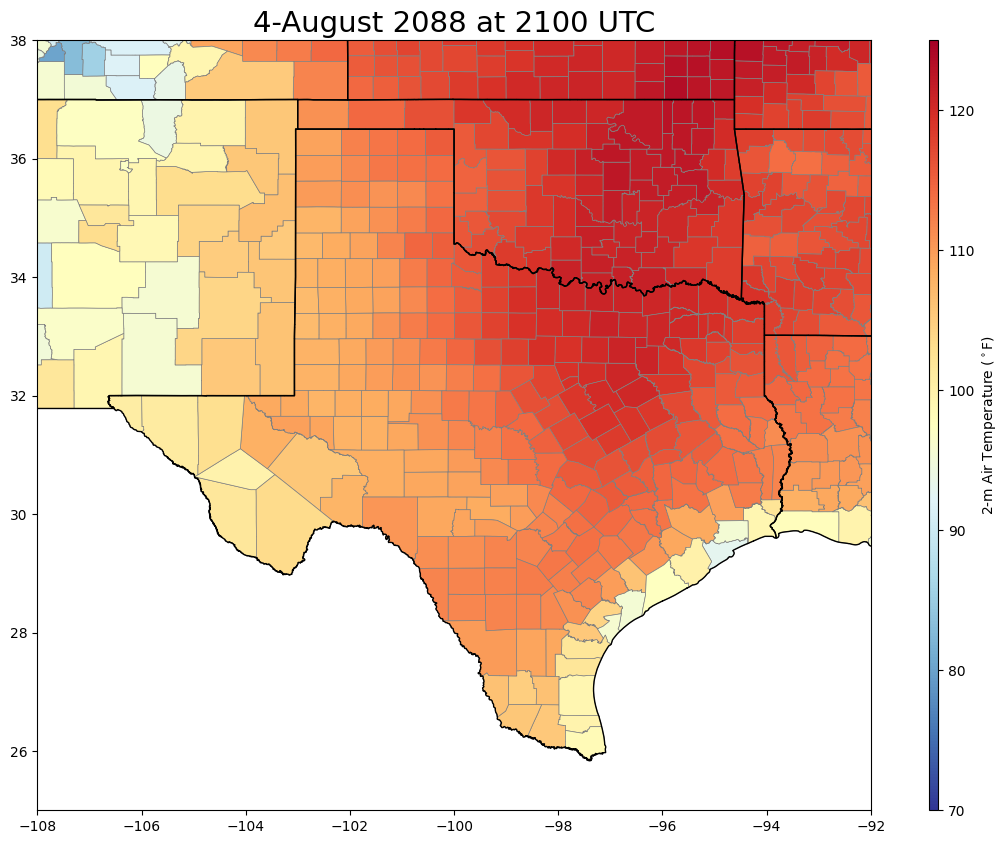

In [5]:
# Read in the county-level temperature file:
temp_df = pd.read_csv((os.path.join(data_input_dir + 'County_Meteorology/' + '2088_08_04_21_UTC_County_Mean_Meteorology.csv')))

# Convert the temperatures from Kelvin to Fahrenheit:
temp_df['T2'] = (1.8 * (temp_df['T2'] - 273)) + 32
       
# Merge the temperature data with the county shapefile:
heat_df = counties_df.merge(temp_df, on='FIPS', how='left')

# Make the plot:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.01)
heat_df.plot(ax = ax, 
             cax = cax, 
             column = 'T2', 
             cmap = 'RdYlBu_r', 
             vmin = heat_t_min, 
             vmax = heat_t_max,
             edgecolor = 'grey', 
             linewidth = 0.5, 
             legend = True, 
             legend_kwds = {'label': ('2-m Air Temperature ($^\circ$F)'), 'orientation': 'vertical'})
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_title('4-August 2088 at 2100 UTC', fontsize = 21)

# Overlay the state boundaries:
states_df.plot(ax = ax, facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 2)
    
# Save the figure:
plt.savefig(os.path.join(image_output_dir, '20880804_2100_UTC.png'), dpi=300, bbox_inches='tight', facecolor='white')


## Make the Cold Snap Plot

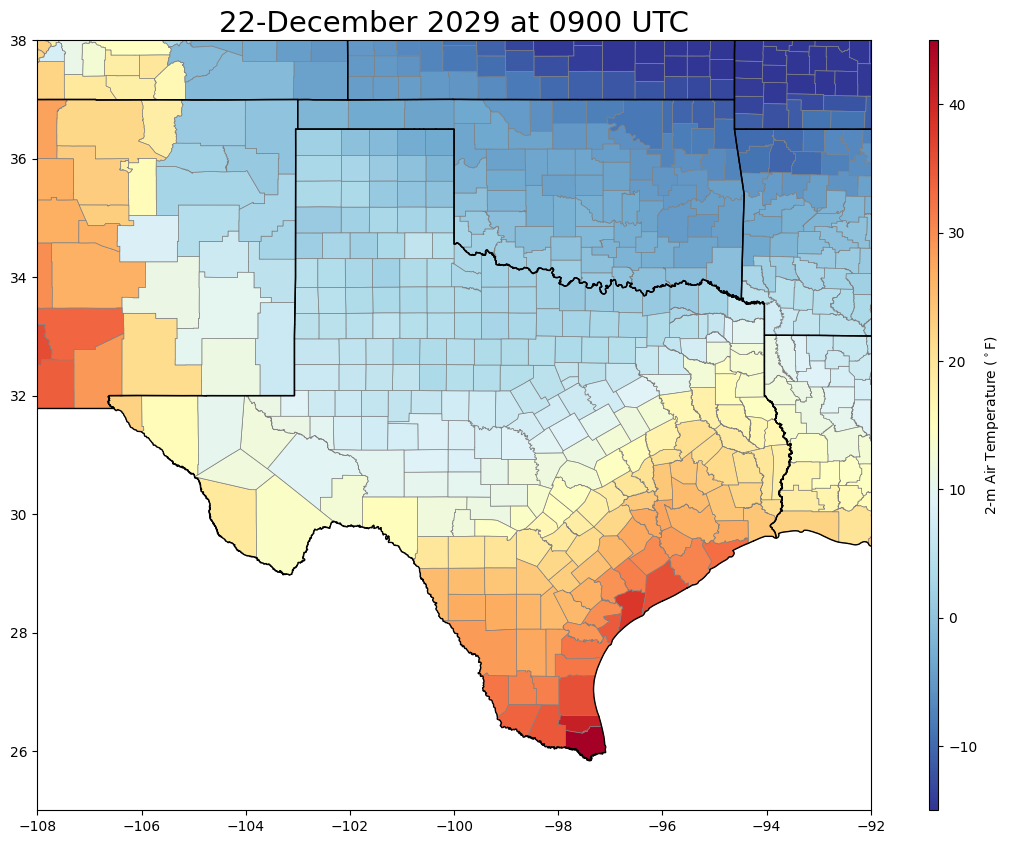

In [6]:
# Read in the county-level temperature file:
temp_df = pd.read_csv((os.path.join(data_input_dir + 'County_Meteorology/' + '2029_12_22_09_UTC_County_Mean_Meteorology.csv')))

# Convert the temperatures from Kelvin to Fahrenheit:
temp_df['T2'] = (1.8 * (temp_df['T2'] - 273)) + 32
       
# Merge the temperature data with the county shapefile:
heat_df = counties_df.merge(temp_df, on='FIPS', how='left')

# Make the plot:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.01)
heat_df.plot(ax = ax, 
             cax = cax, 
             column = 'T2', 
             cmap = 'RdYlBu_r', 
             vmin = cold_t_min, 
             vmax = cold_t_max,
             edgecolor = 'grey', 
             linewidth = 0.5, 
             legend = True, 
             legend_kwds = {'label': ('2-m Air Temperature ($^\circ$F)'), 'orientation': 'vertical'})
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_title('22-December 2029 at 0900 UTC', fontsize = 21)

# Overlay the state boundaries:
states_df.plot(ax = ax, facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 2)
    
# Save the figure:
plt.savefig(os.path.join(image_output_dir, '20291222_0900_UTC.png'), dpi=300, bbox_inches='tight', facecolor='white')
